# Enunciado

Usando los datos almacenados en data2.csv, crea un modelo de clasificación usando los modelos de NaiveBayes mostrados en el vídeo 5. Indicad qué modelo da mejores resultados. Os toca investigar cómo cargar un archivo csv desde Google Collab.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 1. Importación de los datos

In [2]:
df = pd.read_csv('csv/data2.csv')
df['Label'] = df['Label'].astype('int')
df

,Feature_1,Feature_2,Label
0,0.496714,0.000000,0
1,0.647689,1.523030,0
2,0.000000,0.000000,0
3,1.579213,0.767435,0
4,0.000000,0.542560,0
...,...,...,...
995,3.800410,3.754291,1
996,4.188913,3.708304,1
997,3.351448,4.070150,1
998,2.973479,2.118125,1


# 2. Preparación de los datos

In [3]:
# Separamos los datos de entrada de los de salida
X = df.drop('Label', axis=1)
y = df['Label']

# Separamos los datos de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# 3. Modelo GaussianNB

In [4]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

model = GaussianNB()
model.fit(X_train, y_train)

y_model = model.predict(X_test)
accuracy_score(y_test, y_model)

0.992

Evaluación del modelo GaussianNB

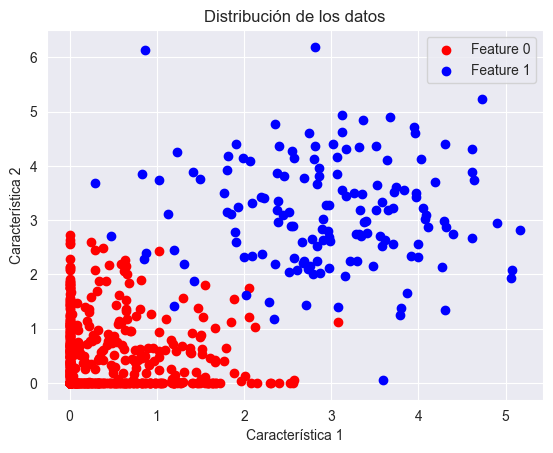

In [5]:
# Distribución de los datos de entrada
COLORS = ['red', 'blue']

for i in range(2):
    plt.scatter(X_train['Feature_1'][y_train==i], X_train['Feature_2'][y_train==i], c=COLORS[i], label=f'Feature {i}')
    
plt.title('Distribución de los datos')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()

In [6]:
# Tabla de precisión del modelo GaussianNB
print(classification_report(y_test, y_model))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       201
           1       0.96      1.00      0.98        49

    accuracy                           0.99       250
   macro avg       0.98      1.00      0.99       250
weighted avg       0.99      0.99      0.99       250


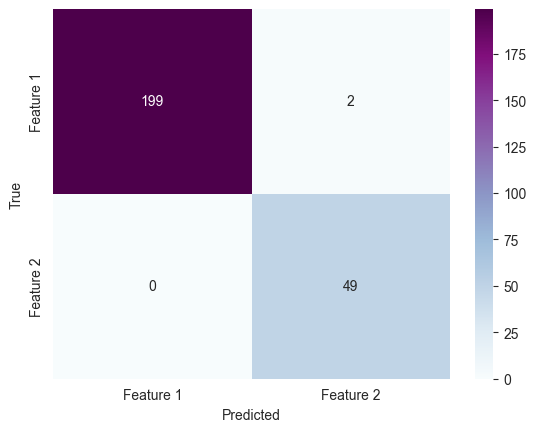

In [7]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_model)
features = ('Feature 1', 'Feature 2')
sns.heatmap(cm, annot=True, xticklabels=features, yticklabels=features, cmap='BuPu', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 4. Modelo MultinomialNB

In [8]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

y_model = model.predict(X_test)
accuracy_score(y_test, y_model)

0.804

In [16]:
# Tabla de precisión del modelo MultinomialNB
print(classification_report(y_test, y_model, zero_division=0))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       201
           1       0.96      0.98      0.97        49

    accuracy                           0.99       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.99      0.99      0.99       250


# 5. Modelo ComplementNB

In [10]:
from sklearn.naive_bayes import ComplementNB

model = ComplementNB()
model.fit(X_train, y_train)

y_model = model.predict(X_test)
accuracy_score(y_test, y_model)

0.588

In [11]:
# Tabla de precisión del modelo ComplementNB
print(classification_report(y_test, y_model))

              precision    recall  f1-score   support

           0       0.86      0.59      0.70       201
           1       0.26      0.59      0.36        49

    accuracy                           0.59       250
   macro avg       0.56      0.59      0.53       250
weighted avg       0.74      0.59      0.63       250


# 6. Modelo BernoulliNB

In [12]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_train, y_train)

y_model = model.predict(X_test)
accuracy_score(y_test, y_model)

0.804

In [13]:
# Tabla de precisión del modelo BernoulliNB
print(classification_report(y_test, y_model))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       201
           1       0.00      0.00      0.00        49

    accuracy                           0.80       250
   macro avg       0.40      0.50      0.45       250
weighted avg       0.65      0.80      0.72       250


C:\Users\sergi\Documents\Estudios\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sergi\Documents\Estudios\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sergi\Documents\Estudios\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 7. Modelo CategoricalNB

In [14]:
from sklearn.naive_bayes import CategoricalNB

model = CategoricalNB()
model.fit(X_train, y_train)

y_model = model.predict(X_test)
accuracy_score(y_test, y_model)

0.988

In [15]:
# Tabla de precisión del modelo CategoricalNB
print(classification_report(y_test, y_model))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       201
           1       0.96      0.98      0.97        49

    accuracy                           0.99       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.99      0.99      0.99       250
